In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Function to load data
def load_data(filename):
    return pd.read_csv(filename)

# Function to compute CDF
def compute_cdf(data):
    x = np.sort(data)
    y = np.arange(1, len(x) + 1) / len(x)
    return x, y

# Load data for each mode
timestamp = "final"
modes = ["RA2C", "RA2C_fed", "A2C", "recurrent", "fixedprob", "vanilla"]
dataframes = {}

for mode in modes:
    filename = f"test_log_{mode}_{timestamp}.csv"
    dataframes[mode] = load_data(filename)
    
# Set the style for the plot
sns.set_theme(style="whitegrid")
sns.set_palette("husl")
colors = sns.color_palette("husl", len(modes))

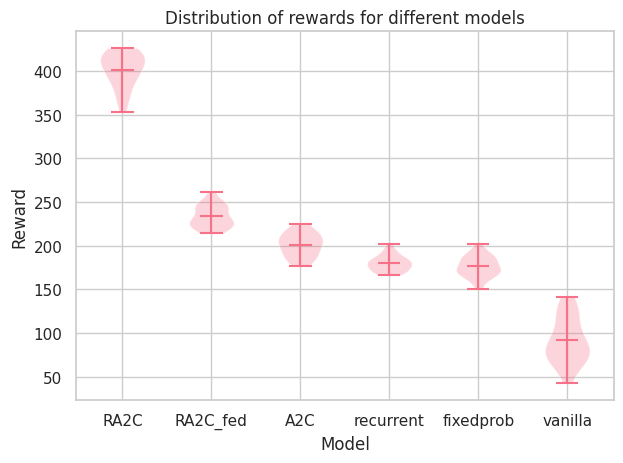

In [2]:
fig, ax = plt.subplots()
# Draw the violinplot only when the epoch is 299.
violin = ax.violinplot([dataframes[mode]["reward"][dataframes[mode]["epoch"]==299] for mode in modes],
                       showmeans=True)
# Naming the x-axis, y-axis and the whole graph
plt.xlabel("Model")
plt.ylabel("Reward")
plt.title("Distribution of rewards for different models")
plt.xticks([1, 2, 3, 4, 5, 6], modes)
plt.tight_layout()
plt.show()

In [5]:
pd.concat([dataframes["RA2C"]['aoi_0'], dataframes["RA2C"]['aoi_7']])

0       0.000000
1       0.000000
2       0.000000
3       0.000000
4       0.003333
          ...   
5995    0.000000
5996    0.000000
5997    0.000000
5998    0.000000
5999    0.000000
Length: 12000, dtype: float64

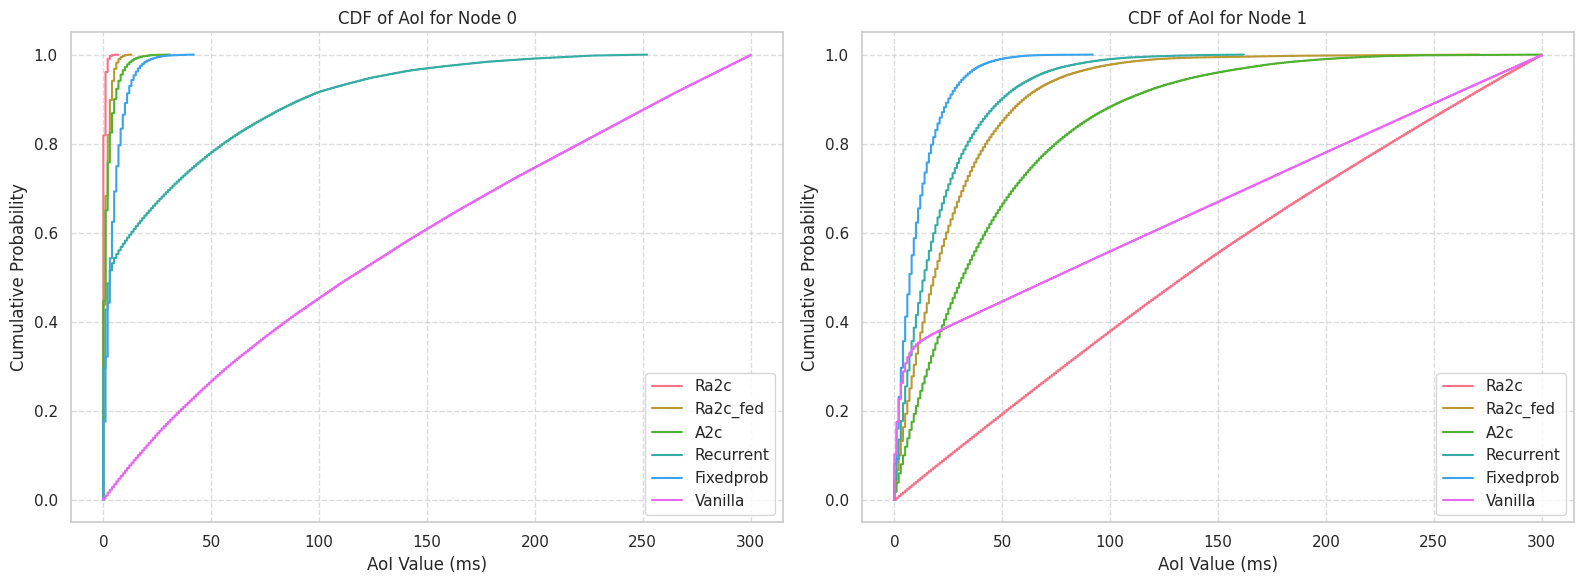

In [3]:
# Function to compute CDF
def compute_cdf(data):
    x = np.sort(data)
    y = np.arange(1, len(x) + 1) / len(x)
    return x, y

# Create CDF plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

for i, mode in enumerate(modes):
    df = dataframes[mode]
    
    # CDF for aoi_0
    x0, y0 = compute_cdf(pd.concat([df['aoi_0'], df['aoi_7']]))
    ax1.plot(x0*300, y0, label=mode.capitalize(), color=colors[i])
    
    # CDF for aoi_1
    x1, y1 = compute_cdf(pd.concat([df[f'aoi_{i}'] for i in range(1, 7)]))
    ax2.plot(x1*300, y1, label=mode.capitalize(), color=colors[i])

# Customize the first subplot (aoi_0)
ax1.set_xlabel('AoI Value (ms)')
ax1.set_ylabel('Cumulative Probability')
ax1.set_title('CDF of AoI for Node 0')
ax1.legend()
ax1.grid(True, linestyle='--', alpha=0.7)

# Customize the second subplot (aoi_1)
ax2.set_xlabel('AoI Value (ms)')
ax2.set_ylabel('Cumulative Probability')
ax2.set_title('CDF of AoI for Node 1')
ax2.legend()
ax2.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()

In [60]:
# Set the style for the plot
sns.set_theme(style="whitegrid")
colors = sns.color_palette("husl", 4)  # 4 colors for 4 modes

# Function to load data
def load_data(filename):
    return pd.read_csv(filename)

# Load data for each mode
timestamp = "20240820_121815"
modes = ["RA2C", "recurrent", "vanilla", "fixedprob"]
dataframes = {}

for mode in modes:
    filename = f"test_log_{mode}_{timestamp}.csv"
    dataframes[mode] = load_data(filename)


In [68]:
action_columns = ['action_0', 'action_1', 'action_2', 'action_3', 'action_4', 'action_5', 'action_6', 'action_7']
dataframes["RA2C"][action_columns].to_numpy().sum()

10363

In [27]:
# fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
action_columns = ['action_0', 'action_1', 'action_2', 'action_3', 'action_4', 'action_5', 'action_6', 'action_7']

for i, mode in enumerate(modes):
    df = dataframes[mode]
    print(f"Mode: {mode}")
    print(f"Avg. number of tx actions of all agents: {df[action_columns].to_numpy().sum()/10}")

Mode: RA2C
Avg. number of tx actions of all agents: 142.2
Mode: RA2C_fed
Avg. number of tx actions of all agents: 115.0
Mode: A2C
Avg. number of tx actions of all agents: 132.4
Mode: recurrent
Avg. number of tx actions of all agents: 105.4
Mode: fixedprob
Avg. number of tx actions of all agents: 100.7
Mode: vanilla
Avg. number of tx actions of all agents: 105.9


In [32]:
# Print action distributions per agent 0 to 7 for each mode
for mode in modes:
    df = dataframes[mode]
    print(f"")
    print(f"Mode: {mode}")
    for i in range(8):
        print(f"Agent {i}: {df[f'action_{i}'].mean():.3f}", end=" ")


Mode: RA2C
Agent 0: 0.813 Agent 1: 0.780 Agent 2: 0.203 Agent 3: 0.460 Agent 4: 0.720 Agent 5: 0.623 Agent 6: 0.163 Agent 7: 0.977 
Mode: RA2C_fed
Agent 0: 0.420 Agent 1: 0.530 Agent 2: 0.473 Agent 3: 0.530 Agent 4: 0.470 Agent 5: 0.460 Agent 6: 0.440 Agent 7: 0.510 
Mode: A2C
Agent 0: 0.777 Agent 1: 0.540 Agent 2: 0.577 Agent 3: 0.633 Agent 4: 0.657 Agent 5: 0.410 Agent 6: 0.580 Agent 7: 0.240 
Mode: recurrent
Agent 0: 0.013 Agent 1: 0.337 Agent 2: 0.503 Agent 3: 0.487 Agent 4: 0.567 Agent 5: 0.550 Agent 6: 0.383 Agent 7: 0.673 
Mode: fixedprob
Agent 0: 0.197 Agent 1: 0.483 Agent 2: 0.500 Agent 3: 0.470 Agent 4: 0.473 Agent 5: 0.500 Agent 6: 0.527 Agent 7: 0.207 
Mode: vanilla
Agent 0: 0.000 Agent 1: 0.333 Agent 2: 0.540 Agent 3: 1.000 Agent 4: 1.000 Agent 5: 0.367 Agent 6: 0.290 Agent 7: 0.000 